# Sentiment Analisis
## 1) Understand Data
     Analysing missing data.
     Wordcloud plots for positive and negative tweets to visualise most frequent words for each.
## 2) Preprocess Data
## 3) Build Predictive Model to predict the tweet sentiments with tweet text data
## 4) Train The Model
## 5) Evaluate The Model 
## 6) Predict Sentiment on Unseen Data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import string
import re
import pickle
import timeit
import time
from tensorflow import set_random_seed
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,  WhitespaceTokenizer
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from keras.layers import Input, Dense, Embedding, Flatten
from keras.layers import SpatialDropout1D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud,STOPWORDS
from collections import Counter

Using TensorFlow backend.


set seed to reproduce experiments

In [2]:
seed = 1234
random.seed(seed)
np.random.seed(seed)
set_random_seed(seed)

Program Parameters

In [3]:
maxlen = maxlen = 125
max_features = 10000
test_size_param = 0.1
validation_split_param = 0.1
epochs_param = 20
batch_size_param = 32

Read the dataset:

In [4]:
dataset = pd.read_csv('Tweets.csv')

take a look on dataset and coulmns

In [5]:
dataset.head(20)
#list(dataset.columns)

,tweet_id,airline_sentiment,name,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,cairdin,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,jnardino,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,yvonnalynn,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,jnardino,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,jnardino,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)
5,5.703010e+17,negative,jnardino,@VirginAmerica seriously would pay $30 a fligh...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)
6,5.703010e+17,positive,cjmcginnis,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2/24/2015 11:13,San Francisco CA,Pacific Time (US & Canada)
7,5.703000e+17,neutral,pilot,@VirginAmerica Really missed a prime opportuni...,NaN,2/24/2015 11:12,Los Angeles,Pacific Time (US & Canada)
8,5.703000e+17,positive,dhepburn,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2/24/2015 11:11,San Diego,Pacific Time (US & Canada)
9,5.702950e+17,positive,YupitsTate,"@VirginAmerica it was amazing, and arrived an ...",NaN,2/24/2015 10:53,Los Angeles,Eastern Time (US & Canada)


In [6]:
list(dataset.columns)

['tweet_id',
 'airline_sentiment',
 'name',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone']

In [7]:
dataset.count()

tweet_id             14640
airline_sentiment    14640
name                 14640
text                 14640
tweet_coord           1019
tweet_created        14640
tweet_location        9907
user_timezone         9820
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 8 columns):
tweet_id             14640 non-null float64
airline_sentiment    14640 non-null object
name                 14640 non-null object
text                 14640 non-null object
tweet_coord          1019 non-null object
tweet_created        14640 non-null object
tweet_location       9907 non-null object
user_timezone        9820 non-null object
dtypes: float64(1), object(7)
memory usage: 915.1+ KB


number of nulls for each column are :

In [9]:
dataset.isna().sum()

tweet_id                 0
airline_sentiment        0
name                     0
text                     0
tweet_coord          13621
tweet_created            0
tweet_location        4733
user_timezone         4820
dtype: int64

Most of tweet coord is NA, it's better to remove it:

In [10]:
del dataset['tweet_coord']

## Labels   
Every tweet has a label describing the sentiment. The labels are:   
     
negative    
neutral    
positive   

In [11]:
num_classes =len(dataset["airline_sentiment"].unique())

In [12]:
dataset['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

#### Impalanced Dataset (unequal distribution of classes)
Most frequent tweets are "Negative" with 9178 tweets 

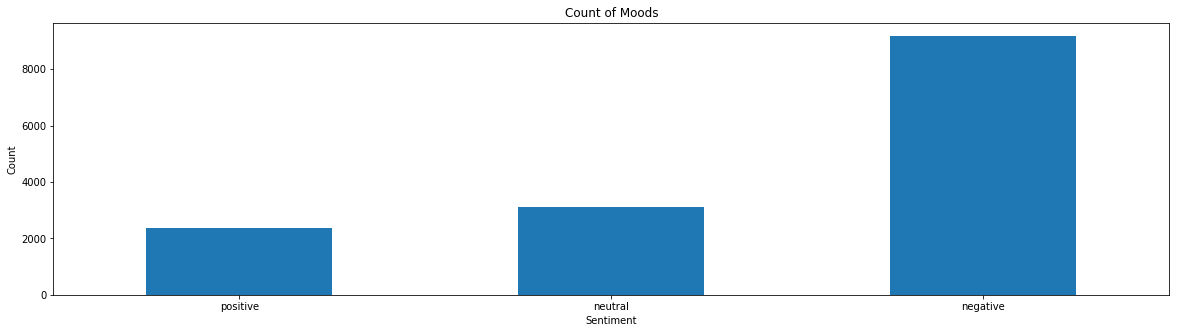

In [13]:
plt.figure(figsize=(20,5))
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.title('Count of Moods')
dataset["airline_sentiment"].value_counts(normalize=False, sort=False).plot(kind="bar", rot=0)
plt.show()

#dataset["Sentiment"].value_counts(normalize=True, sort=False).plot(kind="bar", rot=0)
#plt.savefig('unpalanced_sentiment.png', bbox_inches='tight')

Take a look on text data:

In [14]:
dataset['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
6        @VirginAmerica yes, nearly every time I fly VX...
7        @VirginAmerica Really missed a prime opportuni...
8          @virginamerica Well, I didn't…but NOW I DO! :-D
9        @VirginAmerica it was amazing, and arrived an ...
10       @VirginAmerica did you know that suicide is th...
11       @VirginAmerica I &lt;3 pretty graphics. so muc...
12       @VirginAmerica This is such a great deal! Alre...
13       @VirginAmerica @virginmedia I'm flying your #f...
14                                  @VirginAmerica Thanks!
15           @VirginAmerica SFO-PDX schedule is still MIA.
16       @VirginAmerica So excited for my first cross c.

I have noticed that most of tweets start with (@VirginAmerica, @AmericanAir, and others):

In [15]:
companies = []
for tweet in dataset['text']:
    companies.append(re.findall(r"@[\w]*", tweet)[0].lower())

In [16]:
set(companies)

{'@albertbreer',
 '@americanair',
 '@andrewfallis',
 '@catfoodbeerglue',
 '@chasefoster',
 '@dadboner',
 '@deltaassist',
 '@djevolutionhd',
 '@eatgregeat',
 '@hillaconlin',
 '@imaginedragons',
 '@internjohnradio',
 '@jetblue',
 '@kciairport',
 '@lindaswc',
 '@malhoit',
 '@mandarinjourney',
 '@melissaafrancis',
 '@ninadavuluri',
 '@nrhodes85',
 '@nytimes',
 '@ods1819',
 '@sarahpompei',
 '@sb5551',
 '@scm1133',
 '@shannonwoodward',
 '@southwestair',
 '@timbennettg3',
 '@united',
 '@usairways',
 '@vanessaannz',
 '@virginamerica'}

(@virginamerica, @southwestair, @united, @jetblue,  @americanair, @usairways ) Have a great repetation :

In [17]:
Counter(companies)

Counter({'@virginamerica': 504,
         '@united': 3817,
         '@lindaswc': 1,
         '@mandarinjourney': 1,
         '@southwestair': 2417,
         '@melissaafrancis': 1,
         '@dadboner': 1,
         '@imaginedragons': 1,
         '@kciairport': 1,
         '@internjohnradio': 1,
         '@hillaconlin': 1,
         '@jetblue': 2215,
         '@catfoodbeerglue': 1,
         '@eatgregeat': 1,
         '@nytimes': 1,
         '@shannonwoodward': 1,
         '@ninadavuluri': 1,
         '@usairways': 2905,
         '@sb5551': 1,
         '@timbennettg3': 1,
         '@nrhodes85': 2,
         '@sarahpompei': 1,
         '@andrewfallis': 1,
         '@albertbreer': 1,
         '@scm1133': 1,
         '@americanair': 2754,
         '@deltaassist': 2,
         '@ods1819': 1,
         '@chasefoster': 1,
         '@djevolutionhd': 1,
         '@malhoit': 1,
         '@vanessaannz': 1})

it seems to be companies or Airports, Let's put it in coulmn

In [18]:
min_threshold = 10
comp_dic = Counter(companies)
famous_comp = list({c : comp_dic[c] for c in comp_dic if comp_dic[c] >= min_threshold}.keys())

In [19]:
dataset['company'] = [c[1:] if c in famous_comp else 'nan' for c in companies ]

Most tweets on which ?

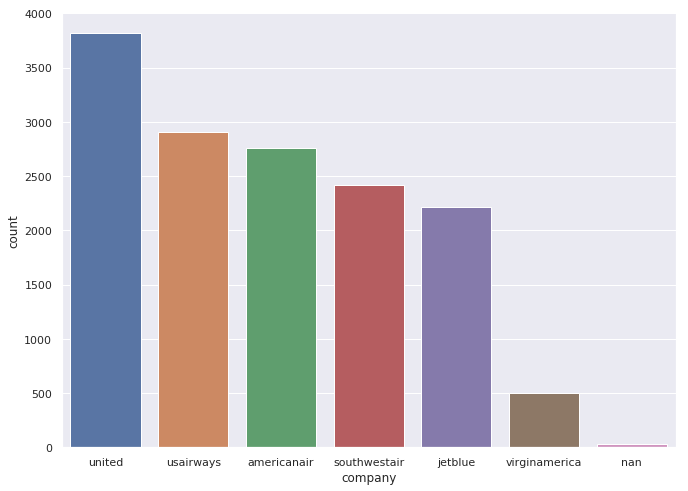

In [20]:
sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(dataset['company'], order = dataset['company'].value_counts().index)

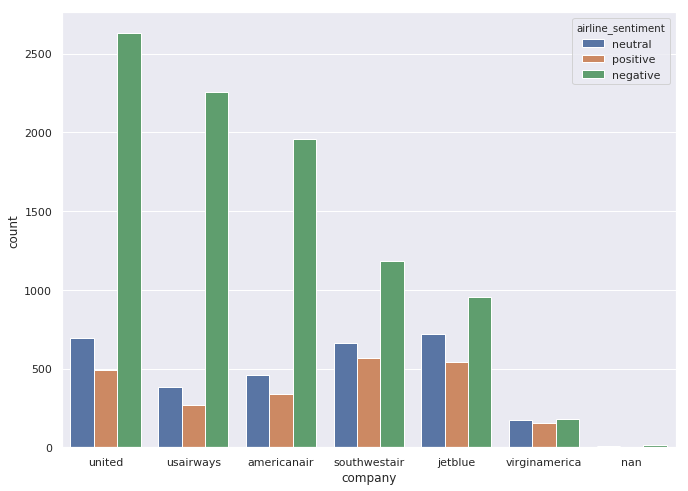

In [21]:
sns.countplot(x=dataset['company'], hue=dataset['airline_sentiment'], order = dataset['company'].value_counts().index)


What is positive tweets?, what in negative tweets? Let's see

In [22]:
dataset[dataset['airline_sentiment']=='negative']['text']

3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
15           @VirginAmerica SFO-PDX schedule is still MIA.
17       @VirginAmerica  I flew from NYC to SFO last we...
20       @VirginAmerica why are your first fares in May...
24       @VirginAmerica you guys messed up my seating.....
25       @VirginAmerica status match program.  I applie...
26       @VirginAmerica What happened 2 ur vegan food o...
28       @VirginAmerica amazing to me that we can't get...
30       @VirginAmerica hi! I just bked a cool birthday...
32       @VirginAmerica help, left expensive headphones...
33       @VirginAmerica awaiting my return phone call, ...
39       @VirginAmerica Your chat support is not workin...
41       @VirginAmerica Hey, first time flyer next week...
55       @VirginAmerica hi! i'm so excited about your $...
61       @VirginAmerica I called a 3-4 weeks ago about .

Wordcloud for negative sentiments :     
Intuative, Words like waiting, Late flight, canceled flight, delay, and rude are present in the most frequent words of negative tweets.

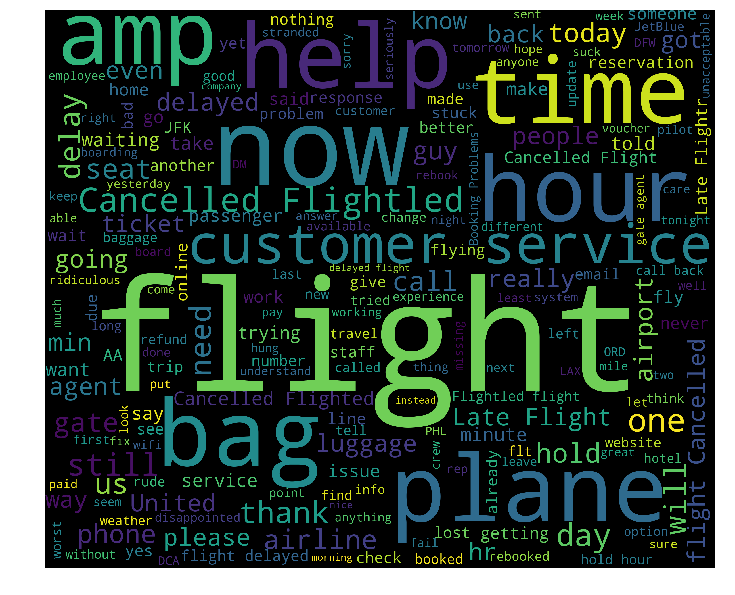

In [23]:
new_df=dataset[dataset['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [24]:
dataset[dataset['airline_sentiment']=='positive']['text']

1        @VirginAmerica plus you've added commercials t...
6        @VirginAmerica yes, nearly every time I fly VX...
8          @virginamerica Well, I didn't…but NOW I DO! :-D
9        @VirginAmerica it was amazing, and arrived an ...
11       @VirginAmerica I &lt;3 pretty graphics. so muc...
12       @VirginAmerica This is such a great deal! Alre...
13       @VirginAmerica @virginmedia I'm flying your #f...
14                                  @VirginAmerica Thanks!
16       @VirginAmerica So excited for my first cross c...
18                         I ❤️ flying @VirginAmerica. ☺️👍
19       @VirginAmerica you know what would be amazingl...
21       @VirginAmerica I love this graphic. http://t.c...
22       @VirginAmerica I love the hipster innovation. ...
34       @VirginAmerica this is great news!  America co...
36       @VirginAmerica Moodlighting is the only way to...
37       @VirginAmerica @freddieawards Done and done! B...
40       @VirginAmerica View of downtown Los Angeles, t.

Wordcloud for positive sentiments :     
    Intuative, Words like thanks, good, amazing, and great are present in the most frequent words of positive tweets. 

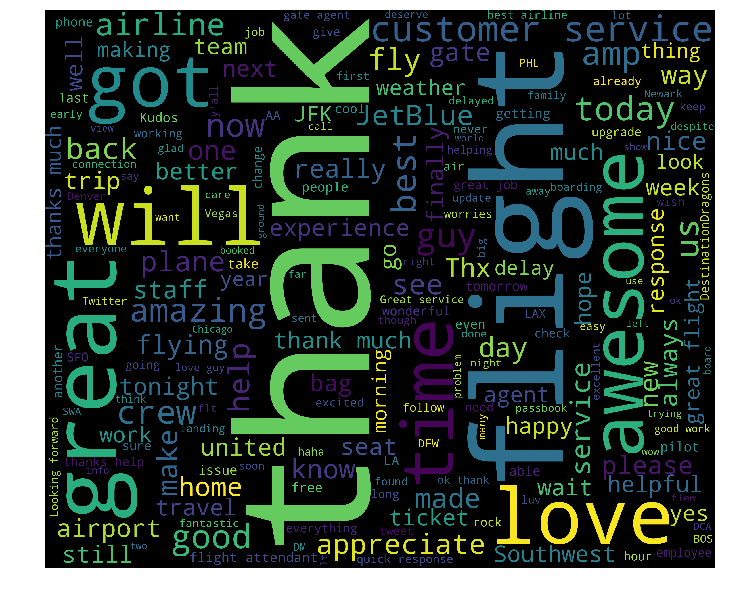

In [25]:
new_df=dataset[dataset['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Take a look on tweet ID:

In [26]:
dataset['tweet_id'].value_counts()

5.696670e+17    28
5.696040e+17    28
5.696270e+17    26
5.702720e+17    26
5.696710e+17    25
5.696200e+17    25
5.702710e+17    24
5.696720e+17    24
5.699380e+17    23
5.699390e+17    23
5.703070e+17    23
5.696990e+17    23
5.699240e+17    22
5.702810e+17    22
5.696420e+17    22
5.696220e+17    22
5.696330e+17    22
5.696760e+17    22
5.696060e+17    22
5.702760e+17    22
5.696680e+17    21
5.699890e+17    21
5.703050e+17    21
5.699510e+17    21
5.696210e+17    21
5.695920e+17    21
5.702970e+17    21
5.699360e+17    21
5.696600e+17    20
5.696510e+17    20
                ..
5.703110e+17     1
5.679150e+17     1
5.682700e+17     1
5.689560e+17     1
5.697730e+17     1
5.682880e+17     1
5.680230e+17     1
5.701660e+17     1
5.691410e+17     1
5.690960e+17     1
5.679320e+17     1
5.687220e+17     1
5.691000e+17     1
5.679800e+17     1
5.689340e+17     1
5.682960e+17     1
5.691450e+17     1
5.686620e+17     1
5.701640e+17     1
5.686380e+17     1
5.679390e+17     1
5.694460e+17

Most frequent ID has 28 tweet(for diff companies)

In [27]:
dataset[dataset['tweet_id']==5.696670e+17]

,tweet_id,airline_sentiment,name,text,tweet_created,tweet_location,user_timezone,company
1549,5.696670e+17,negative,Jodieepps,@united customer service sucks! They hang up ...,2/22/2015 17:16,Michigan,Quito,united
1550,5.696670e+17,negative,KateRChrisman,@united JP - DM message who? Can't get a DM th...,2/22/2015 17:15,"Oakland, CA",NaN,united
1551,5.696670e+17,negative,MCB235,@united strikes again! Why board anyone if the...,2/22/2015 17:15,Home,Central Time (US & Canada),united
1552,5.696670e+17,negative,mckakia,@united: thanks for the miserable trip GNV&lt...,2/22/2015 17:14,NaN,NaN,united
1553,5.696670e+17,negative,tonywhelan,@united Missed KTM flight due to ur Cancelled ...,2/22/2015 17:14,Stavromula Beta,Quito,united
4895,5.696670e+17,neutral,lauraannB85,@SouthwestAir Tell me the secrets to flying hi...,2/22/2015 17:17,North Carolina,Eastern Time (US & Canada),southwestair
4896,5.696670e+17,positive,CommDocPA,@SouthwestAir That would be brighter than all ...,2/22/2015 17:17,NaN,Eastern Time (US & Canada),southwestair
4897,5.696670e+17,negative,MrDockery_,@SouthwestAir How about auto check in for CP h...,2/22/2015 17:17,NaN,Central Time (US & Canada),southwestair
4898,5.696670e+17,positive,dgackey,@SouthwestAir got mine! Just in time for the ...,2/22/2015 17:17,"Austin, TX",Central Time (US & Canada),southwestair
4899,5.696670e+17,positive,MarkMais,@SouthwestAir I love my Companion Pass (qualif...,2/22/2015 17:17,"Denver, Colorado",Mountain Time (US & Canada),southwestair


In [28]:
dataset["tweet_location"].value_counts()

Boston, MA                       157
New York, NY                     156
Washington, DC                   150
New York                         127
USA                              126
Chicago                          104
New York City                     96
Los Angeles, CA                   96
NYC                               95
San Francisco, CA                 91
San Francisco                     86
Chicago, IL                       81
Brooklyn, NY                      66
Los Angeles                       64
Austin, TX                        64
Washington, D.C.                  63
Boston                            62
Dallas, TX                        54
Washington DC                     53
Nashville, TN                     45
Texas                             42
NY                                42
Philadelphia, PA                  38
San Diego                         38
Denver, CO                        37
Houston, TX                       35
Global                            34
S

In [29]:
dataset["name"].value_counts()

JetBlueNews        63
kbosspotter        32
_mhertz            29
otisday            28
throthra           27
weezerandburnie    23
rossj987           23
MeeestarCoke       22
GREATNESSEOA       22
scoobydoo9749      21
jasemccarty        20
flemmingerin       19
ElmiraBudMan       19
georgetietjen      19
thomashoward88     18
chagaga2013        18
ThatJasonEaton     18
Aero0729           18
SMHillman          17
worldwideweg       17
patrick_maness     16
heyheyman          16
arthurhasher       16
Allisonjones704    15
luvthispayne       15
geekstiel          14
BernardLeCroix     14
ColtSTaylor        14
riricesq           14
Evan_Flay          14
                   ..
micp3208            1
AndavoTravel        1
hamervich           1
doug_kurtz          1
EEB4                1
BionicSocialite     1
purdom44            1
syncros             1
Looluca             1
oxanniekateox       1
JuntyH              1
mckakia             1
415seanz            1
ninjamagic17        1
bdaneu    

In [30]:
dataset["tweet_id"].value_counts() 

5.696670e+17    28
5.696040e+17    28
5.696270e+17    26
5.702720e+17    26
5.696710e+17    25
5.696200e+17    25
5.702710e+17    24
5.696720e+17    24
5.699380e+17    23
5.699390e+17    23
5.703070e+17    23
5.696990e+17    23
5.699240e+17    22
5.702810e+17    22
5.696420e+17    22
5.696220e+17    22
5.696330e+17    22
5.696760e+17    22
5.696060e+17    22
5.702760e+17    22
5.696680e+17    21
5.699890e+17    21
5.703050e+17    21
5.699510e+17    21
5.696210e+17    21
5.695920e+17    21
5.702970e+17    21
5.699360e+17    21
5.696600e+17    20
5.696510e+17    20
                ..
5.703110e+17     1
5.679150e+17     1
5.682700e+17     1
5.689560e+17     1
5.697730e+17     1
5.682880e+17     1
5.680230e+17     1
5.701660e+17     1
5.691410e+17     1
5.690960e+17     1
5.679320e+17     1
5.687220e+17     1
5.691000e+17     1
5.679800e+17     1
5.689340e+17     1
5.682960e+17     1
5.691450e+17     1
5.686620e+17     1
5.701640e+17     1
5.686380e+17     1
5.679390e+17     1
5.694460e+17

In [31]:
dataset["tweet_created"].value_counts() 

2/23/2015 11:50    11
2/22/2015 14:22    11
2/22/2015 17:15    11
2/24/2015 9:15     10
2/22/2015 17:14    10
2/22/2015 13:06    10
2/24/2015 9:19     10
2/22/2015 17:36    10
2/22/2015 14:11    10
2/23/2015 11:16    10
2/24/2015 9:54      9
2/22/2015 15:35     9
2/24/2015 9:37      9
2/22/2015 14:14     9
2/24/2015 9:02      9
2/24/2015 9:33      9
2/23/2015 14:35     9
2/23/2015 11:24     9
2/22/2015 13:07     9
2/22/2015 14:16     9
2/23/2015 13:11     9
2/22/2015 20:33     8
2/22/2015 15:02     8
2/22/2015 17:22     8
2/24/2015 6:43      8
2/24/2015 10:33     8
2/22/2015 15:46     8
2/22/2015 15:47     8
2/24/2015 9:14      8
2/23/2015 14:50     8
                   ..
2/22/2015 3:02      1
2/23/2015 16:15     1
2/22/2015 0:58      1
2/18/2015 10:08     1
2/24/2015 2:14      1
2/20/2015 17:45     1
2/19/2015 17:47     1
2/17/2015 5:26      1
2/23/2015 3:16      1
2/23/2015 21:29     1
2/21/2015 17:07     1
2/22/2015 14:21     1
2/22/2015 16:16     1
2/19/2015 13:14     1
2/21/2015 

## Build a model that can detect the sentiment of a given tweet
#### let's explore tweets first and preprocess it

mean and max length of tweets

In [32]:
dataset['text'].str.len().mean()

103.82206284153006

In [33]:
dataset['text'].str.len().max()

186

Finding number of unique words in dataset

In [34]:
all_words=' '.join(dataset['text'])
all_words = word_tokenize(all_words)
len(set(all_words))

20116

Most frequent words, most of them are stop words and special characters

In [35]:
FreqDist(all_words).most_common(20)

[('@', 16583),
 ('.', 13590),
 ('to', 8589),
 ('I', 6348),
 ('the', 5796),
 ('!', 5312),
 ('?', 4678),
 ('a', 4364),
 (',', 4156),
 ('for', 3953),
 ('you', 3921),
 ('united', 3826),
 ('on', 3671),
 ('#', 3651),
 ('and', 3573),
 ('flight', 3155),
 ('my', 3039),
 ('USAirways', 2935),
 ('AmericanAir', 2924),
 ('is', 2727)]


   ### Convert data to proper format: 
    
    1) Lowercase all characters   
    2) Removing Twitter Handles @user_name and Remove strange symbols 
    3) Get lemma and remove stop words
    4) Remove empty phrases and phrases that have one character
    5) split data (predictor and response) and encode it  
    6) pad Text  
    7) Split data to train and test  
    
    
    
    

### 1) *Lowercase all characters*   


In [36]:
dataset['text'] = dataset['text'].apply(lambda x: x.lower())

dataset['text']

0                      @virginamerica what @dhepburn said.
1        @virginamerica plus you've added commercials t...
2        @virginamerica i didn't today... must mean i n...
3        @virginamerica it's really aggressive to blast...
4        @virginamerica and it's a really big bad thing...
5        @virginamerica seriously would pay $30 a fligh...
6        @virginamerica yes, nearly every time i fly vx...
7        @virginamerica really missed a prime opportuni...
8          @virginamerica well, i didn't…but now i do! :-d
9        @virginamerica it was amazing, and arrived an ...
10       @virginamerica did you know that suicide is th...
11       @virginamerica i &lt;3 pretty graphics. so muc...
12       @virginamerica this is such a great deal! alre...
13       @virginamerica @virginmedia i'm flying your #f...
14                                  @virginamerica thanks!
15           @virginamerica sfo-pdx schedule is still mia.
16       @virginamerica so excited for my first cross c.

### 2) *Remove strange symbols*   
#### let's get all characters that corpus have


In [37]:
def getUniqueChar(sentence):
    return set(sentence)

uniqueChar = {'a'}
for phrase in dataset['text']:
    uniqueChar.update(getUniqueChar(phrase))
    
uniqueChar    
#len(uniqueChar) #= 54

{'\n',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '=',
 '?',
 '@',
 '[',
 ']',
 '^',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\xa0',
 '£',
 '°',
 'º',
 'á',
 'â',
 'ã',
 'é',
 'ê',
 'í',
 'ʖ',
 '͜',
 '͡',
 '\u200b',
 '–',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '…',
 '€',
 '↔',
 '⌚',
 '☀',
 '☕',
 '☺',
 '♥',
 '⛄',
 '✅',
 '✈',
 '✌',
 '✔',
 '✨',
 '❄',
 '❌',
 '❗',
 '❤',
 '➡',
 '⤴',
 '⤵',
 '⭐',
 '️',
 '🆖',
 '🆘',
 '🇧',
 '🇬',
 '🇸',
 '🇺',
 '🌏',
 '🌞',
 '🌟',
 '🌴',
 '🍅',
 '🍷',
 '🍸',
 '🍻',
 '🎀',
 '🎉',
 '🎲',
 '🎵',
 '🐩',
 '🐳',
 '🐴',
 '👀',
 '👉',
 '👊',
 '👋',
 '👌',
 '👍',
 '👎',
 '👏',
 '👠',
 '👸',
 '👺',
 '👿',
 '💁',
 '💔',
 '💕',
 '💖',
 '💗',
 '💘',
 '💙',
 '💜',
 '💝',
 '💤',
 '💩',
 '💪',
 '💯',
 '💺',
 '📱',
 '📲',
 '🔵',
 '😀',
 '😁',
 '😂',
 '😃',
 '😄',
 '😅',
 

Remove twitter handels

In [38]:
def sub_match(str):
  #return re.sub('^[^@]*@\w+', '', str)
  return re.sub (r"@[\w]*", '', str)

dataset['text'] = dataset['text'].apply(sub_match)

dataset['text']

0                                              what  said.
1         plus you've added commercials to the experien...
2         i didn't today... must mean i need to take an...
3         it's really aggressive to blast obnoxious "en...
4                 and it's a really big bad thing about it
5         seriously would pay $30 a flight for seats th...
6         yes, nearly every time i fly vx this “ear wor...
7         really missed a prime opportunity for men wit...
8                         well, i didn't…but now i do! :-d
9         it was amazing, and arrived an hour early. yo...
10        did you know that suicide is the second leadi...
11        i &lt;3 pretty graphics. so much better than ...
12        this is such a great deal! already thinking a...
13         i'm flying your #fabulous #seductive skies a...
14                                                 thanks!
15                          sfo-pdx schedule is still mia.
16        so excited for my first cross country flight .

check if there any handle

In [39]:
c=[]
for tweet in dataset['text']:
    c.append(re.findall(r"@[\w]*", tweet))
c

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


#### Remove Strange symbols and emotions
P.S we can improve the model by using these emotions

In [40]:
our_alphabets="".join(list(string.ascii_lowercase)+[" ","\'"])
# the result will generate empty lines
dataset['text']=dataset['text'].apply(lambda x: re.sub(r'[^'+our_alphabets+']','',str(x))).apply(lambda x: re.sub(r'  *'," ",x))


#### now, the corpus just have english alphabets, apostrophe and space

In [41]:
uniqueChar = {'a'}
for phrase in dataset['text']:
    uniqueChar.update(getUniqueChar(phrase))
    
uniqueChar    
#len(uniqueChar) #= 28

{' ',
 "'",
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

### 3) get lemma and remove stop words

#### Customize stopwords that will be removed 

In [42]:
stopwords = set(stopwords.words('english'))
excep = set(('very', 'too', 'not', 'nor', 'no', 'more', 'but', 'few', 'than', 'wouldn', 'weren', 'wasn', 'shouldn', 'mustn', 'mightn', 'isn', 'haven', 'hasn', 'hadn', 'doesn', 'didn', 'couldn', 'aren'))
customizedStopwords = stopwords - excep
customizedStopwords 

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'by',
 'can',
 "couldn't",
 'd',
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 "mightn't",
 'most',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 "shan't",
 'she',
 "she's",
 'should',
 "should've",
 "shouldn't",
 'so',
 'some',
 'such',
 't',
 'that',
 "that'l

#### Remove these words 

In [43]:
whitespaceTokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tweet = [lemmatizer.lemmatize(w) for w in whitespaceTokenizer.tokenize(text) if not w in customizedStopwords]
    return ' '.join(tweet)

dataset['text'] = dataset["text"].apply(lemmatize_text)


#### take a second look on Most frequent words 

In [44]:
all_words=' '.join(dataset['text'])
all_words=word_tokenize(all_words)
#len(set(all_words)) #14757
FreqDist(all_words).most_common(40)

[('flight', 4538),
 ('not', 1615),
 ('no', 1471),
 ('get', 1372),
 ('i', 1236),
 ('but', 1229),
 ('hour', 1150),
 ('thanks', 1070),
 ('cancelled', 1056),
 ('u', 1033),
 ("'s", 985),
 ('service', 983),
 ('time', 941),
 ('customer', 928),
 ('help', 861),
 ('bag', 756),
 ('plane', 719),
 ("'m", 688),
 ('amp', 641),
 ('hold', 640),
 ('need', 631),
 ('thank', 601),
 ('one', 577),
 ('still', 571),
 ('day', 559),
 ('please', 557),
 ('would', 556),
 ('call', 552),
 ('airline', 550),
 ("n't", 544),
 ('gate', 540),
 ('ca', 536),
 ('delayed', 529),
 ('back', 524),
 ('flightled', 502),
 ('got', 478),
 ('seat', 477),
 ('phone', 451),
 ('delay', 438),
 ('like', 429)]

### 4) Remove empty phrases and phrases that have one character:

#### empty phrases and phrases that have one character

In [45]:
dataset[dataset['text'].str.len()<=1]

,tweet_id,airline_sentiment,name,text,tweet_created,tweet_location,user_timezone,company
3509,5.683540e+17,neutral,katie_sul1,,2/19/2015 2:20,NaN,Eastern Time (US & Canada),united
3987,5.678900e+17,neutral,annricord,,2/17/2015 19:33,Canmore,Mountain Time (US & Canada),united
4612,5.699800e+17,neutral,Soldier_Gomez,,2/23/2015 14:00,Las Vegas,Arizona,southwestair
5460,5.689750e+17,neutral,mmillanjr,,2/20/2015 19:27,NaN,NaN,southwestair
5658,5.688300e+17,neutral,sincitycomedy,,2/20/2015 9:49,"Las Vegas, NV",Pacific Time (US & Canada),southwestair
6897,5.700490e+17,neutral,kbosspotter,,2/23/2015 18:33,Logan International Airport,Atlantic Time (Canada),jetblue
6947,5.700000e+17,neutral,eragonbooklover,,2/23/2015 15:20,NaN,NaN,jetblue
7623,5.694990e+17,neutral,OverTheEdge55,,2/22/2015 6:06,NaN,NaN,jetblue
9585,5.698650e+17,negative,jcsolomons,,2/23/2015 6:21,"Boston, MA",Quito,usairways
10735,5.689250e+17,negative,WorstThingsBot,,2/20/2015 16:07,NaN,NaN,usairways


#### Drop these rows

In [46]:
dataset = dataset[dataset.text.str.len()>1]
dataset['text']

0                                                     said
1                   plus added commercial experience tacky
2                   today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
5        seriously would pay flight seat playingit's re...
6        yes nearly every time fly vx ear worm wont go ...
7        really missed prime opportunity men without ha...
8                                           well didn'tbut
9                      amazing arrived hour early too good
10       know suicide second leading cause death among ...
11       lt pretty graphic much better than minimal ico...
12       great deal already thinking nd trip amp even g...
13       i'm flying fabulous seductive sky u take stres...
14                                                  thanks
15                               sfopdx schedule still mia
16       excited first cross country flight lax mco i'v.

### 5) split data (predictor and response) and encode it

In [47]:

labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(dataset['airline_sentiment'])
Y = to_categorical(Y)

In [48]:
X = dataset['text']

In [49]:
Y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

#### Tokenize Text 

In [50]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X))

X = tokenizer.texts_to_sequences(X)


#### take a look on encoding

In [51]:
X[:2]

[[131], [412, 952, 1076, 112, 5279]]

In [52]:
Y[:2]

array([[0., 1., 0.],
       [0., 0., 1.]])

### 6) pad Text

In [53]:
X = pad_sequences(X, maxlen=maxlen)


#### Pad it with zeroes

In [54]:
X.shape

(14624, 125)

### 7) Split data to train and test

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=test_size_param, 
                                                    random_state=seed)

## ***Build Model***
### CNN Model with an embdedding layer

In [56]:
model = Sequential()

# Input / Embdedding
model.add(Embedding(max_features, 150, input_length=maxlen))

# CNN
model.add(SpatialDropout1D(0.2))

model.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

# Output layer
model.add(Dense(num_classes, activation='sigmoid'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 125, 150)          1500000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 125, 150)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 125, 32)           14432     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 62, 64)            6208      
______________

#### compile model

In [57]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


#### Save max epoch

In [58]:
saved_weights_name='maxWeights.h5'

checkpoint = ModelCheckpoint(saved_weights_name, 
                                     monitor='val_acc', 
                                     verbose=1, 
                                     save_best_only=True, 
                                     mode='max')
callbacks_list = [checkpoint]

## Train Model

In [59]:
start = timeit.default_timer()

history = model.fit(X_train, 
                    Y_train, 
                    validation_split = validation_split_param, 
                    epochs=epochs_param, 
                    batch_size=batch_size_param, 
                    callbacks=callbacks_list,
                    verbose=1)

stop = timeit.default_timer()

Instructions for updating:
Use tf.cast instead.
Train on 11844 samples, validate on 1317 samples
Epoch 1/20
11844/11844 [==============================] - 17s 1ms/step - loss: 0.7227 - acc: 0.6869 - val_loss: 0.5958 - val_acc: 0.7585
Epoch 2/20
11844/11844 [==============================] - 16s 1ms/step - loss: 0.4659 - acc: 0.8168 - val_loss: 0.5469 - val_acc: 0.7760
Epoch 3/20
11844/11844 [==============================] - 16s 1ms/step - loss: 0.3037 - acc: 0.8877 - val_loss: 0.6078 - val_acc: 0.7646
Epoch 4/20
11844/11844 [==============================] - 16s 1ms/step - loss: 0.1842 - acc: 0.9352 - val_loss: 0.7201 - val_acc: 0.7585
Epoch 5/20
11844/11844 [==============================] - 16s 1ms/step - loss: 0.1152 - acc: 0.9599 - val_loss: 0.8455 - val_acc: 0.7768
Epoch 6/20
11844/11844 [==============================] - 16s 1ms/step - loss: 0.0754 - acc: 0.9768 - val_loss: 0.9810 - val_acc: 0.7639
Epoch 7/20
11844/11844 [==============================] - 16s 1ms/step - loss: 0.

#### time consumed to run this model for 20 epochs

In [60]:
print ((stop - start)/60)

5.426677263666594


#### save last epoch weghits

In [61]:
 model.save("weights-improvement-last-epoch.hdf5")

#### save History

In [62]:

with open('trainHistoryDict', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)


## evaluation of the model

#### Accuracy:

In [63]:

scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))
#model.metrics_names

1463/1463 [==============================] - 0s 194us/step
Accuracy: 76.90%


#### confusion matrix (intuative)

In [64]:
def decode(pred):
    return np.argmax(pred)
    
y_test_pred = np.apply_along_axis(decode, axis=1, arr= model.predict(X_test)) 
Y_test = np.apply_along_axis(decode, axis=1, arr= Y_test)

In [65]:
cm_model = confusion_matrix(Y_test, y_test_pred)
cm_model

array([[839,  95,  28],
       [ 96, 137,  45],
       [ 42,  32, 149]])